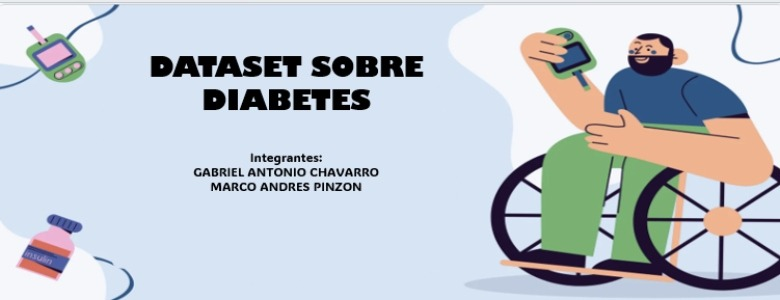

# **Sistema de Detección de Diabetes Basado en IA**

---

**UNIVERSIDAD INDUSTRIAL DE SANTANDER**

**Inteligencia artificial I**

**Profesor:** Gustavo Adolfo Garzón Villamizar

**Estudiantes:**

2152675 - Chavarro Avellaneda Gabriel Antonio - Grupo F1

2200153 - Pinzon Gomez Marco Andres - Grupo E2


---



**INTRODUCCION**

La diabetes se ha convertido en una crisis de salud pública a nivel global.

**537 millones:** de adultos viven con diabetes, según la Federación Internacional de Diabetes (FID).

**Casi la mitad:** de las personas con diabetes no saben que la tienen.

**1.5 millones:** de muertes fueron causadas directamente por la diabetes en 2019.

La diabetes es una enfermedad crónica que afecta a millones de personas en todo el mundo. Si no se trata adecuadamente, puede provocar graves complicaciones de salud, como enfermedades cardíacas, accidentes cerebrovasculares, ceguera e insuficiencia renal. El diagnóstico temprano y la intervención son cruciales para controlar la diabetes y prevenir estas complicaciones.

Aquí es donde un proyecto de IA para la detección de diabetes puede tener un impacto significativo. Al utilizar herramientas para analizar grandes conjuntos de datos de registros médicos. Esto permite a los profesionales de la salud intervenir temprano, antes de que la enfermedad progrese y cause daños graves.



---




Se realiza la importacion de las librerias

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot, init_notebook_mode

Se realiza la conexion con el drive

In [ ]:
# @title
import os
from google.colab import drive
path = "/content/drive/My Drive/"
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


Se realiza el cargo de datos de nuestra database

In [ ]:
# @title
csv_path = '/content/drive/MyDrive/ProjectAI/diabetes.csv'
df = pd.read_csv(csv_path, sep=',')

# **PRIMERA ENTREGA**

# *Visualizacion del database*

Revisamos el tamaño original del database

In [ ]:
# @title
print('El tamaño de la database es:' , df.shape)

El tamaño de la database es: (101766, 51)


Estudiamos mas el database, con .info,.describe, .columns...

In [ ]:
# @title
print(df.columns)

Index(['id', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide.metformin', 'glipizide.metformin',
       'glimepiride.pioglitazone', 'metformin.rosiglitazone',
       'metformin.pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


In [ ]:
# @title
df.describe()

,id,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,50883.500000,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,29377.458084,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,25442.250000,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,50883.500000,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,76324.750000,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,101766.000000,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [ ]:
# @title
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      101766 non-null  object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    101766 non-null  object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                101766 non-null  object
 12  medical_specialty         101766 non-null  object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

In [ ]:
# @title
df.head(10)

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,6,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,7,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,8,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,>30
8,9,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,10,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# *Graficos Y Manipulacion de Datos*

Nos apoyamos de graficos para apoyarnos en el analisis de datos

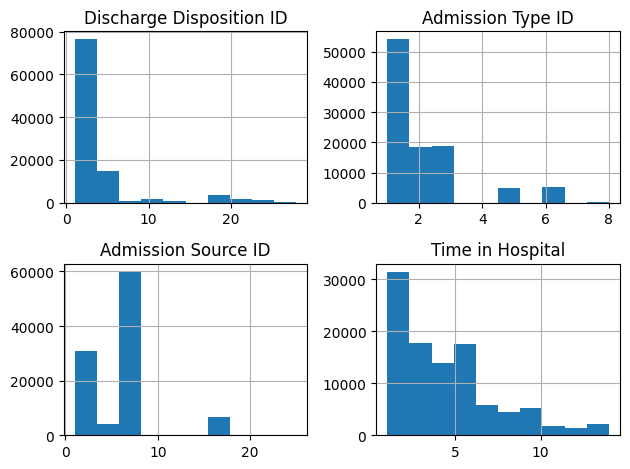

In [ ]:
# @title
ax1 = plt.subplot(2, 2, 1)
df['discharge_disposition_id'].hist(ax=ax1)
ax1.set_title('Discharge Disposition ID')

ax2 = plt.subplot(2, 2, 2)
df['admission_type_id'].hist(ax=ax2)
ax2.set_title('Admission Type ID')

ax3 = plt.subplot(2, 2, 3)
df['admission_source_id'].hist(ax=ax3)
ax3.set_title('Admission Source ID')

ax4 = plt.subplot(2, 2, 4)
df['time_in_hospital'].hist(ax=ax4)
ax4.set_title('Time in Hospital')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'number of emergency')

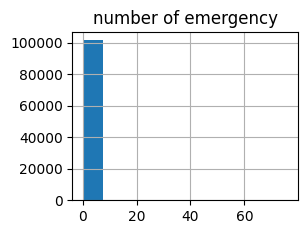

In [ ]:
# @title
ax1 = plt.subplot(2, 2, 1)
df['number_emergency'].hist(ax=ax1)
ax1.set_title('number of emergency')


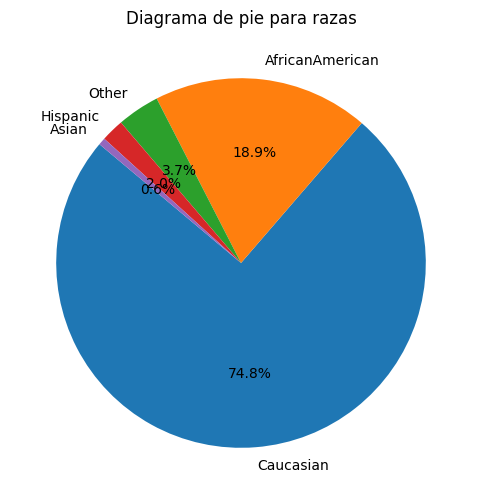

In [ ]:
# @title
df['race'] = df['race'].replace('?', 'Other')
data_counts = df['race'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Diagrama de pie para razas')
plt.show()

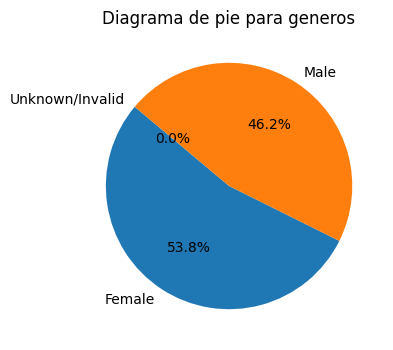

In [ ]:
# @title
data_counts = df['gender'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Diagrama de pie para generos')
plt.show()

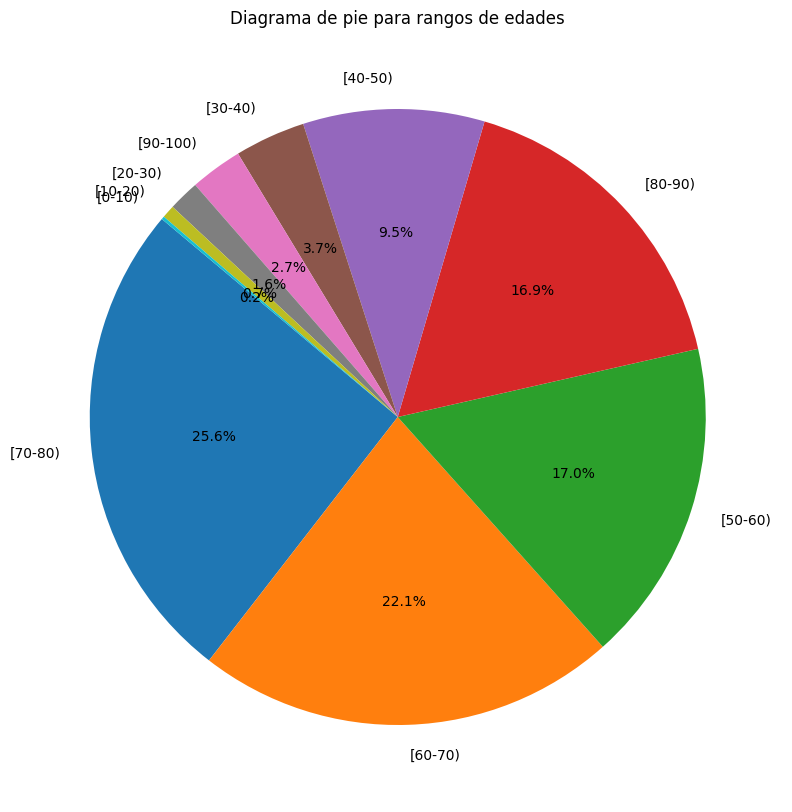

In [ ]:
# @title
data_counts = df['age'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Diagrama de pie para rangos de edades')
plt.show()

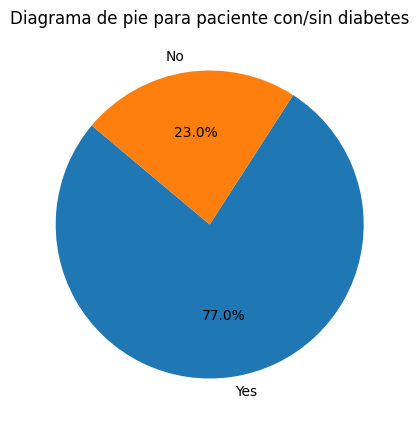

In [ ]:
# @title
data_counts = df['diabetesMed'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Diagrama de pie para paciente con/sin diabetes')
plt.show()

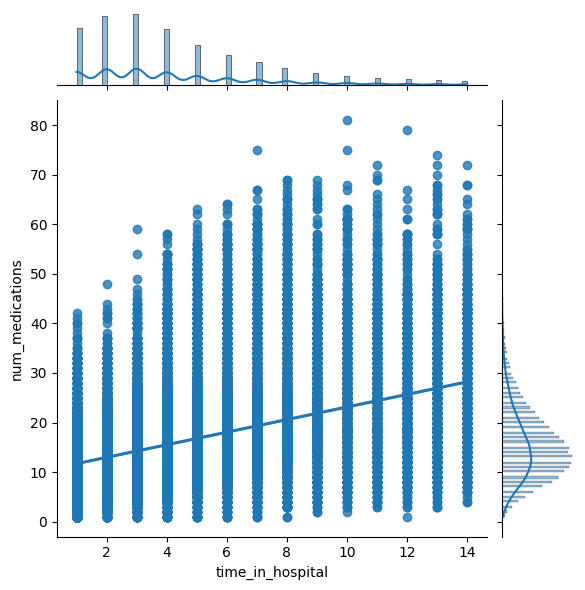

In [ ]:
# @title
sns.jointplot(x='time_in_hospital', y="num_medications", data=df, kind='reg');

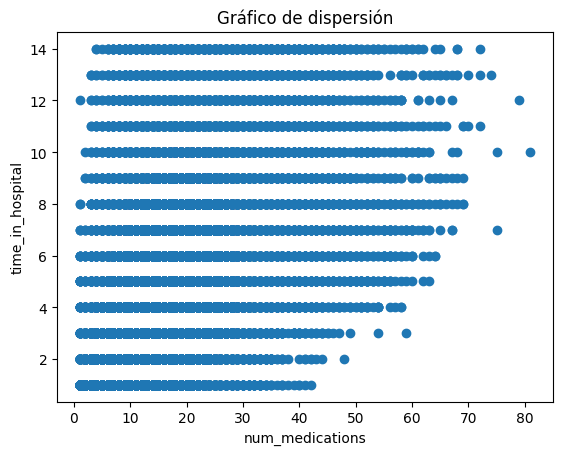

In [ ]:
# @title
plt.scatter(df["num_medications"], df['time_in_hospital'])
plt.title('Gráfico de dispersión')
plt.xlabel('num_medications')
plt.ylabel('time_in_hospital')
plt.show()


In [ ]:
# @title
for col in df.columns:
    print (col, np.sum(df[col] == '?'))

id 0
encounter_id 0
patient_nbr 0
race 0
gender 0
age 0
weight 98569
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40256
medical_specialty 49949
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 358
diag_3 1423
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide.metformin 0
glipizide.metformin 0
glimepiride.pioglitazone 0
metformin.rosiglitazone 0
metformin.pioglitazone 0
change 0
diabetesMed 0
readmitted 0


Observamos que en varias series(columnas) tienen datos representados de la forma ? donde verificamos si la mayoria de datos en esa columna no nos servia para hacer un analisis de los datos. Eliminamos la columna "Peso"(weight), payer_code y medical_specialty pues nos generaban un margen de error, pues habia mas del 50% de los datos que estaban "nulos"

In [ ]:
# @title
del df['weight']
del df['payer_code']
del df['medical_specialty']
df.head()

,id,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Buscamos los medicamentos que se le dan a la minoria de pacientes en el hospital y eliminamos esos medicamentos para evitar sesgos

In [ ]:
# @title
for col in df.columns:
  total = np.sum(df[col] == 'No')
  print (col, total)
  if total > 101700:
    del df[col]
df.shape

id 0
encounter_id 0
patient_nbr 0
race 0
gender 0
age 0
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 0
diag_2 0
diag_3 0
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 81778
repaglinide 100227
nateglinide 101063
chlorpropamide 101680
glimepiride 96575
acetohexamide 101765
glipizide 89080
glyburide 91116
tolbutamide 101743
pioglitazone 94438
rosiglitazone 95401
acarbose 101458
miglitol 101728
troglitazone 101763
tolazamide 101727
examide 101766
citoglipton 101766
insulin 47383
glyburide.metformin 101060
glipizide.metformin 101753
glimepiride.pioglitazone 101765
metformin.rosiglitazone 101764
metformin.pioglitazone 101765
change 54755
diabetesMed 23403
readmitted 0


(101766, 37)

Empezamos a reemplazar los valores object con valores numericos para facilitar los siguientes analisis

In [ ]:
df['race'].replace({'Caucasian': 3,'AfricanAmerican': 2,'Hispanic': 4,'Asian': 1,'Other': 0}, inplace=True)
df['gender'].replace({'Male': 1,'Female': 0,'Unknown/Invalid': 3}, inplace=True)
df['age'].replace({'[0-10)': 0,'[10-20)': 1,'[20-30)': 2,'[30-40)': 3,'[40-50)': 4,'[50-60)': 5,'[60-70)' : 6,'[70-80)': 7, '[80-90)':8, '[90-100)':9}, inplace=True)
df['max_glu_serum'].replace({ np.nan: 0,'>300': 1,'Norm': 2,'>200': 3}, inplace=True)
df['A1Cresult'].replace({np.nan: 0,'>7': 1,'>8': 2,'Norm': 3} , inplace=True)
df['metformin'].replace({'No': 0,'Steady': 1,'Up': 2,'Down': 3}, inplace=True)
df['repaglinide'].replace({'No': 0,'Steady': 1,'Up': 2,'Down': 3}, inplace=True)
df['nateglinide'].replace({'No': 0,'Steady': 1,'Up': 2,'Down': 3}, inplace=True)
df['chlorpropamide'].replace({'No': 0,'Steady': 1,'Up': 2,'Down': 3}, inplace=True)
df['glimepiride'].replace({'No': 0,'Steady': 1,'Up': 2,'Down': 3}, inplace=True)
df['glipizide'].replace({'No': 0,'Steady': 1,'Up': 2,'Down': 3}, inplace=True)
df['glyburide'].replace({'No': 0,'Steady': 1,'Up': 2,'Down': 3}, inplace=True)
df['pioglitazone'].replace({'No': 0,'Steady': 1,'Up': 2,'Down': 3}, inplace=True)
df['rosiglitazone'].replace({'No': 0,'Steady': 1,'Up': 2,'Down': 3}, inplace=True)
df['acarbose'].replace({'No': 0,'Steady': 1,'Up': 2,'Down': 3}, inplace=True)
df['insulin'].replace({'No': 0,'Steady': 1,'Up': 2,'Down': 3}, inplace=True)
df['glyburide.metformin'].replace({'No': 0,'Steady': 1,'Up': 2,'Down': 3}, inplace=True)
df['change'].replace({'No': 0,'Ch': 1}, inplace=True)
df['diabetesMed'].replace({'No': 0,'Yes': 1}, inplace=True)
df['readmitted'].replace({'NO':0, '>30':1, '<30':2}, inplace=True)

In [ ]:
# como esta columna tenia valores numericos pero guardados como object se uso el .to_numeric
df['diag_1'] = pd.to_numeric(df['diag_1'], errors='coerce')

In [ ]:
# eliminamos los otros diagnosticos porque al revisar el database estos datos eran enfermedades que estaban relacionadas con la diabetes
#o que no aportaban relevancia a nuestro objetivo
del df['diag_2']
del df['diag_3']

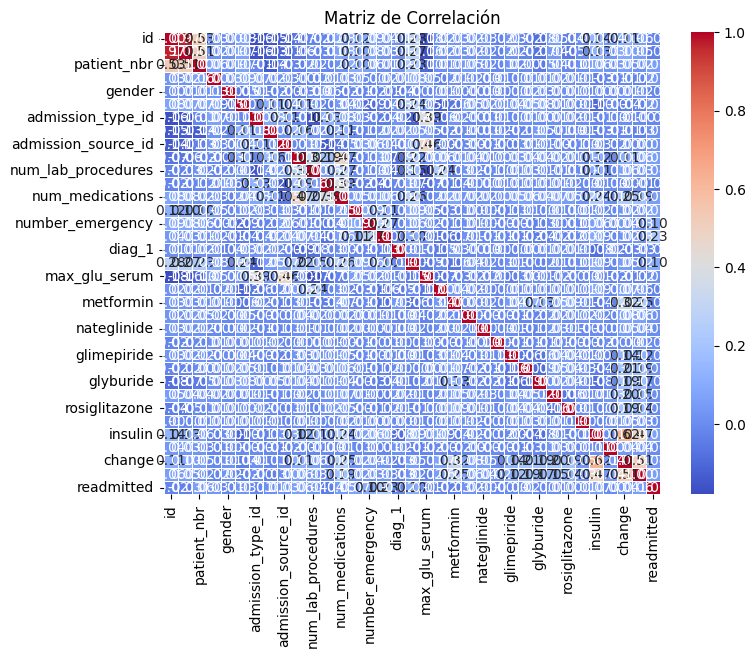

In [ ]:
# @title
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


In [ ]:
# Para facilitar el ground thruth cambiamos los diagnosticos de  diabetes con 1 y los que no tenian diabetes con 0
for i in range(len(df['diag_1'])):
    valor = df['diag_1'].iloc[i]

    if 249.0 <= valor <= 251.0:
        df['diag_1'].iloc[i] = 1
    else:
        df['diag_1'].iloc[i] = 0

Se han truncado las últimas 5000 líneas del flujo de salida.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-c511dcbbad06>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-c511dcbbad06>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-c511dcbbad06>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

# **SEGUNDA ENTREGA**

# *CLASIFICACION*

importamos las librerias

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold


**train_test_split**

In [ ]:
X = df.drop("diag_1", axis=1)
y = df["diag_1"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=21)

# **DecisionTreeClassifier**

In [ ]:
est0 = DecisionTreeClassifier()
est0.fit(X_train, y_train)
y_pred_est0 = est0.predict(X_test)

# Evaluar el modelo
accuracy_est0 = accuracy_score(y_test, y_pred_est0)
print("Accuracy del modelo con Decision Tree Classifier:", accuracy_est0)

#crossValidation
score0 = cross_val_score(est0, X, y, cv=KFold(n_splits=10, random_state=21, shuffle=True), scoring=make_scorer(accuracy_score))
print("promedio del accuracy: ", np.mean(score0))
print("desviacion estandar: ", np.std(score0))

Accuracy del modelo con Decision Tree Classifier: 0.8655792473223937
promedio del accuracy:  0.8630092276300674
desviacion estandar:  0.0029739500335164773


In [ ]:
est1 = DecisionTreeClassifier(criterion="entropy", max_depth=27, random_state=21)
est1.fit(X_train, y_train)
y_pred_est1 = est1.predict(X_test)

# Evaluar el modelo
accuracy_est1 = accuracy_score(y_test, y_pred_est1)
print("Accuracy del Tunning Decision Tree Classifier:", accuracy_est1)

#crossValidation
score1 = cross_val_score(est1, X, y, cv=KFold(n_splits=10, random_state=21, shuffle=True), scoring=make_scorer(accuracy_score))
print("promedio del accuracy: ", np.mean(score1))
print("desviacion estandar: ", np.std(score1))

Accuracy del Tunning Decision Tree Classifier: 0.8659722904588779
promedio del accuracy:  0.8721084890983057
desviacion estandar:  0.0039056493013742855


# **RandomForestClassifier**

In [ ]:
rfc0 = RandomForestClassifier()
rfc0.fit(X_train, y_train)

y_pred_rfc0 = rfc0.predict(X_test)

# Evaluar el modelo
accuracy_rfc0 = accuracy_score(y_test, y_pred_rfc0)
print("Accuracy del modelo con Random Forest Classifier:", accuracy_rfc0)

Accuracy del modelo con Random Forest Classifier: 0.9209000687825489


In [ ]:
rfc1 = RandomForestClassifier(n_estimators=108, criterion='log_loss', max_depth=28)
rfc1.fit(X_train, y_train)

y_pred_rfc1 = rfc1.predict(X_test)

# Evaluar el modelo
accuracy_rfc1 = accuracy_score(y_test, y_pred_rfc1)
print("Accuracy del tunning Random Forest Classifier:", accuracy_rfc1)

Accuracy del tunning Random Forest Classifier: 0.9213913727031542


# **SVC**

In [ ]:
svc0 = SVC()
svc0.fit(X_train, y_train)

y_pred_svc0 = svc0.predict(X_test)

# Evaluar el modelo
accuracy_svc0 = accuracy_score(y_test, y_pred_svc0)
print("Accuracy del modelo con SVC:", accuracy_svc0)

Accuracy del modelo con SVC: 0.9141200746781959


In [ ]:
svc1 = SVC(C=10, kernel='sigmoid')
svc1.fit(X_train, y_train)

y_pred_svc1 = svc1.predict(X_test)

# Evaluar el modelo
accuracy_svc1 = accuracy_score(y_test, y_pred_svc1)
print("Accuracy del tunning SVC:", accuracy_svc1)

Accuracy del tunning SVC: 0.8435688316792768


# *REGRESION*

Importar las librerias

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# **DecisionTreeRegressor**

In [ ]:
dtc0 = DecisionTreeRegressor()
dtc0.fit(X_train, y_train)
y_pred_dtc0 = dtc0.predict(X_test)
mse_dtc0 = mean_squared_error(y_test, y_pred_dtc0)

accuracy_dtc0 = accuracy_score(y_test, y_pred_dtc0)
print("Accuracy del Decision Tree Regressor:", accuracy_dtc0)
print(f"MSE: {mse_dtc0:.3f}")

#crossValidation
score2 = cross_val_score(dtc0, X, y, cv=KFold(n_splits=10, random_state=21, shuffle=True), scoring=make_scorer(accuracy_score))
print("promedio del accuracy: ", np.mean(score2))
print("desviacion estandar: ", np.std(score2))

Accuracy del Decision Tree Regressor: 0.8640070747764567
MSE: 0.136
promedio del accuracy:  0.8638641215578599
desviacion estandar:  0.0024950941295596744


In [ ]:
dtc1 = DecisionTreeRegressor(criterion="friedman_mse", max_depth=127)
dtc1.fit(X_train, y_train)
y_pred_dtc1 = dtc1.predict(X_test)
mse_dtc1 = mean_squared_error(y_test, y_pred_dtc1)

accuracy_dtc1 = accuracy_score(y_test, y_pred_dtc1)
print("Accuracy del tunning Decision Tree Regressor:", accuracy_dtc1)
print(f"MSE: {mse_dtc1:.3f}")

#crossValidation
score3 = cross_val_score(dtc1, X, y, cv=KFold(n_splits=10, random_state=21, shuffle=True), scoring=make_scorer(accuracy_score))
print("promedio del accuracy: ", np.mean(score3))
print("desviacion estandar: ", np.std(score3))

Accuracy del tunning Decision Tree Regressor: 0.8635157708558514
MSE: 0.136
promedio del accuracy:  0.8640410025566345
desviacion estandar:  0.002594597459326675


# **RandomForestRegressor**

In [ ]:
rfr0 = RandomForestRegressor()
rfr0.fit(X_train, y_train)
y_pred_rfr0 = rfr0.predict(X_test)
mse_rfr0 = mean_squared_error(y_test, y_pred_rfr0)

accuracy_rfc0 = accuracy_score(y_test, y_pred_rfc0)
print("Accuracy del Random Forest Regressor:", accuracy_rfc0)
print(f"MSE: {mse_rfr0:.3f}")

Accuracy del Random Forest Regressor: 0.9209000687825489
MSE: 0.068


In [ ]:
rfr1 = RandomForestRegressor(n_estimators=120, criterion='friedman_mse', max_depth=27)
rfr1.fit(X_train, y_train)
y_pred_rfr1 = rfr1.predict(X_test)
mse_rfr1 = mean_squared_error(y_test, y_pred_rfr1)

accuracy_rfc1 = accuracy_score(y_test, y_pred_rfc1)
print("Accuracy del tunning Random Forest Regressor:", accuracy_rfc1)
print(f"MSE: {mse_rfr1:.3f}")

Accuracy del tunning Random Forest Regressor: 0.9213913727031542
MSE: 0.067


# **SVR**

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)

print(f"MSE del SVR: {mse_svr:.3f}")

MSE del SVR: 0.079


In [ ]:
svr0 = SVR(kernel="poly")
svr0.fit(X_train, y_train)
y_pred_svr0 = svr0.predict(X_test)
mse_svr0 = mean_squared_error(y_test, y_pred_svr0)

print(f"MSE del Tunning SVR: {mse_svr0:.3f}")

MSE del Tunning SVR: 0.079


# *Arquitecturas de una red neuronal artificial simple*

In [ ]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

X = df.drop("diag_1", axis=1)
y = df["diag_1"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

num_classes = len(np.unique(y))

y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)

model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_16 (Flatten)        (None, 34)                0         
                                                                 
 dense_54 (Dense)            (None, 128)               4480      
                                                                 
 dense_55 (Dense)            (None, 2)                 258       
                                                                 
Total params: 4738 (18.51 KB)
Trainable params: 4738 (18.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history1 = model1.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
2036/2036 [==============================] - 6s 3ms/step - loss: 449247.2500 - accuracy: 0.8402 - val_loss: 89041.7891 - val_accuracy: 0.9147
Epoch 2/10
2036/2036 [==============================] - 4s 2ms/step - loss: 137128.6875 - accuracy: 0.8463 - val_loss: 32700.4629 - val_accuracy: 0.9147
Epoch 3/10
2036/2036 [==============================] - 4s 2ms/step - loss: 129008.8672 - accuracy: 0.8453 - val_loss: 31725.3574 - val_accuracy: 0.9147
Epoch 4/10
2036/2036 [==============================] - 5s 3ms/step - loss: 101939.3828 - accuracy: 0.8456 - val_loss: 13583.8594 - val_accuracy: 0.9103
Epoch 5/10
2036/2036 [==============================] - 5s 2ms/step - loss: 90930.3828 - accuracy: 0.8449 - val_loss: 26260.5234 - val_accuracy: 0.9147
Epoch 6/10
2036/2036 [==============================] - 4s 2ms/step - loss: 88148.3438 - accuracy: 0.8458 - val_loss: 72213.9531 - val_accuracy: 0.9147
Epoch 7/10
2036/2036 [==============================] - 5s 3ms/step - loss: 79209.87

In [ ]:
history1 = model1.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
2036/2036 [==============================] - 6s 3ms/step - loss: 59030.1289 - accuracy: 0.8465 - val_loss: 90833.1953 - val_accuracy: 0.9147
Epoch 2/20
2036/2036 [==============================] - 6s 3ms/step - loss: 52398.5938 - accuracy: 0.8470 - val_loss: 11485.8975 - val_accuracy: 0.8365
Epoch 3/20
2036/2036 [==============================] - 4s 2ms/step - loss: 43977.0703 - accuracy: 0.8455 - val_loss: 48302.8242 - val_accuracy: 0.9147
Epoch 4/20
2036/2036 [==============================] - 5s 3ms/step - loss: 40753.1914 - accuracy: 0.8450 - val_loss: 12255.8223 - val_accuracy: 0.9147
Epoch 5/20
2036/2036 [==============================] - 6s 3ms/step - loss: 39632.5352 - accuracy: 0.8450 - val_loss: 28321.8770 - val_accuracy: 0.7008
Epoch 6/20
2036/2036 [==============================] - 4s 2ms/step - loss: 33248.6016 - accuracy: 0.8451 - val_loss: 6808.2930 - val_accuracy: 0.8895
Epoch 7/20
2036/2036 [==============================] - 5s 3ms/step - loss: 28976.2188 - 

In [ ]:
history1 = model1.fit(X_train, y_train_encoded, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
2036/2036 [==============================] - 5s 3ms/step - loss: 6736.0918 - accuracy: 0.8444 - val_loss: 3006.1870 - val_accuracy: 0.9147
Epoch 2/30
2036/2036 [==============================] - 4s 2ms/step - loss: 6266.9424 - accuracy: 0.8448 - val_loss: 13379.0371 - val_accuracy: 0.9147
Epoch 3/30
2036/2036 [==============================] - 5s 2ms/step - loss: 5622.9297 - accuracy: 0.8452 - val_loss: 2372.7461 - val_accuracy: 0.9147
Epoch 4/30
2036/2036 [==============================] - 6s 3ms/step - loss: 4833.5718 - accuracy: 0.8455 - val_loss: 7270.8545 - val_accuracy: 0.9147
Epoch 5/30
2036/2036 [==============================] - 4s 2ms/step - loss: 4640.9238 - accuracy: 0.8439 - val_loss: 1694.5374 - val_accuracy: 0.9063
Epoch 6/30
2036/2036 [==============================] - 5s 2ms/step - loss: 3772.1982 - accuracy: 0.8431 - val_loss: 3639.2268 - val_accuracy: 0.9147
Epoch 7/30
2036/2036 [==============================] - 6s 3ms/step - loss: 3587.3025 - accuracy: 0

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 34)                0         
                                                                 
 dense_56 (Dense)            (None, 128)               4480      
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dense_58 (Dense)            (None, 32)                2080      
                                                                 
 dense_59 (Dense)            (None, 2)                 66        
                                                                 
Total params: 14882 (58.13 KB)
Trainable params: 14882 (58.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history2 = model2.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
2036/2036 [==============================] - 6s 2ms/step - loss: 63788.1250 - accuracy: 0.8440 - val_loss: 6639.8110 - val_accuracy: 0.9147
Epoch 2/10
2036/2036 [==============================] - 6s 3ms/step - loss: 7127.5547 - accuracy: 0.8442 - val_loss: 11076.5645 - val_accuracy: 0.9147
Epoch 3/10
2036/2036 [==============================] - 6s 3ms/step - loss: 2208.3191 - accuracy: 0.8452 - val_loss: 630.9362 - val_accuracy: 0.8869
Epoch 4/10
2036/2036 [==============================] - 5s 2ms/step - loss: 49.5874 - accuracy: 0.8962 - val_loss: 0.2919 - val_accuracy: 0.9147
Epoch 5/10
2036/2036 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy: 0.9147
Epoch 6/10
2036/2036 [==============================] - 5s 2ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2916 - val_accuracy: 0.9147
Epoch 7/10
2036/2036 [==============================] - 5s 2ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.

In [ ]:
history2 = model2.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
2036/2036 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2916 - val_accuracy: 0.9147
Epoch 2/20
2036/2036 [==============================] - 5s 2ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy: 0.9147
Epoch 3/20
2036/2036 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy: 0.9147
Epoch 4/20
2036/2036 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2916 - val_accuracy: 0.9147
Epoch 5/20
2036/2036 [==============================] - 5s 3ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2916 - val_accuracy: 0.9147
Epoch 6/20
2036/2036 [==============================] - 7s 3ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2916 - val_accuracy: 0.9147
Epoch 7/20
2036/2036 [==============================] - 5s 2ms/step - loss: 0.2942 - accuracy: 0.9136 - val_loss: 0.2916 - val_accuracy:

In [ ]:
history2 = model2.fit(X_train, y_train_encoded, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
2036/2036 [==============================] - 6s 3ms/step - loss: 0.2942 - accuracy: 0.9136 - val_loss: 0.2920 - val_accuracy: 0.9147
Epoch 2/30
2036/2036 [==============================] - 5s 2ms/step - loss: 0.2940 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy: 0.9147
Epoch 3/30
2036/2036 [==============================] - 5s 2ms/step - loss: 0.2942 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy: 0.9147
Epoch 4/30
2036/2036 [==============================] - 9s 5ms/step - loss: 0.2942 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy: 0.9147
Epoch 5/30
2036/2036 [==============================] - 5s 2ms/step - loss: 0.2942 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy: 0.9147
Epoch 6/30
2036/2036 [==============================] - 7s 3ms/step - loss: 0.2942 - accuracy: 0.9136 - val_loss: 0.2917 - val_accuracy: 0.9147
Epoch 7/30
2036/2036 [==============================] - 5s 2ms/step - loss: 0.2942 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy:

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 34)                0         
                                                                 
 dense_60 (Dense)            (None, 256)               8960      
                                                                 
 dense_61 (Dense)            (None, 128)               32896     
                                                                 
 dense_62 (Dense)            (None, 64)                8256      
                                                                 
 dense_63 (Dense)            (None, 32)                2080      
                                                                 
 dense_64 (Dense)            (None, 16)                528       
                                                                 
 dense_65 (Dense)            (None, 8)               

In [ ]:
history3 = model3.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10


Exception ignored in: <function _xla_gc_callback at 0x7da2a1231d80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


2036/2036 [==============================] - 71s 4ms/step - loss: 10454.2549 - accuracy: 0.9113 - val_loss: 0.2957 - val_accuracy: 0.9147
Epoch 2/10
2036/2036 [==============================] - 5s 3ms/step - loss: 0.2947 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy: 0.9147
Epoch 3/10
2036/2036 [==============================] - 8s 4ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2916 - val_accuracy: 0.9147
Epoch 4/10
2036/2036 [==============================] - 5s 3ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2916 - val_accuracy: 0.9147
Epoch 5/10
2036/2036 [==============================] - 7s 3ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2916 - val_accuracy: 0.9147
Epoch 6/10
2036/2036 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy: 0.9147
Epoch 7/10
2036/2036 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy: 0.914

In [ ]:
history3 = model3.fit(X_train, y_train_encoded, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
2036/2036 [==============================] - 8s 4ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy: 0.9147
Epoch 2/20
2036/2036 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2916 - val_accuracy: 0.9147
Epoch 3/20
2036/2036 [==============================] - 7s 4ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2916 - val_accuracy: 0.9147
Epoch 4/20
2036/2036 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy: 0.9147
Epoch 5/20
2036/2036 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy: 0.9147
Epoch 6/20
2036/2036 [==============================] - 7s 4ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2916 - val_accuracy: 0.9147
Epoch 7/20
2036/2036 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy:

In [ ]:
history3 = model3.fit(X_train, y_train_encoded, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/30
2036/2036 [==============================] - 6s 3ms/step - loss: 0.2940 - accuracy: 0.9136 - val_loss: 0.2918 - val_accuracy: 0.9147
Epoch 2/30
2036/2036 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2916 - val_accuracy: 0.9147
Epoch 3/30
2036/2036 [==============================] - 7s 3ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy: 0.9147
Epoch 4/30
2036/2036 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy: 0.9147
Epoch 5/30
2036/2036 [==============================] - 8s 4ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy: 0.9147
Epoch 6/30
2036/2036 [==============================] - 6s 3ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy: 0.9147
Epoch 7/30
2036/2036 [==============================] - 8s 4ms/step - loss: 0.2941 - accuracy: 0.9136 - val_loss: 0.2915 - val_accuracy: